In [ ]:
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Cargamos el archivo 
df = pd.read_csv('../Data/house-prices.csv')
print(df.head())

   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East


In [3]:
#Veamos los valores nulos
df.isnull().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [4]:
df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [ ]:
#Utilizaremos boxplots para ver si se tienen valores atipicos
fig = px.box(df, y='SqFt', title="Gráfico de Caja de SqFt(Tamaño pies cuadrado)")
fig.show()


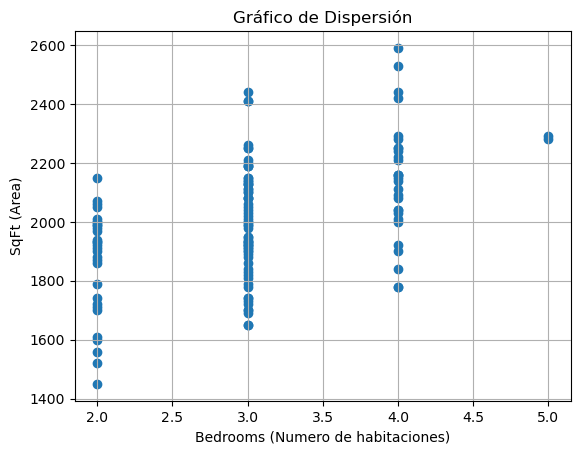

In [ ]:
#Aunque vemos dos valores atípicos no se eliminan debido a que no son datos anormales
plt.scatter(df['Bedrooms'], df['SqFt'])
plt.title('Gráfico de Dispersión')
plt.xlabel('Bedrooms (Numero de habitaciones)')
plt.ylabel('SqFt (Area)')
plt.grid(True)
plt.show()


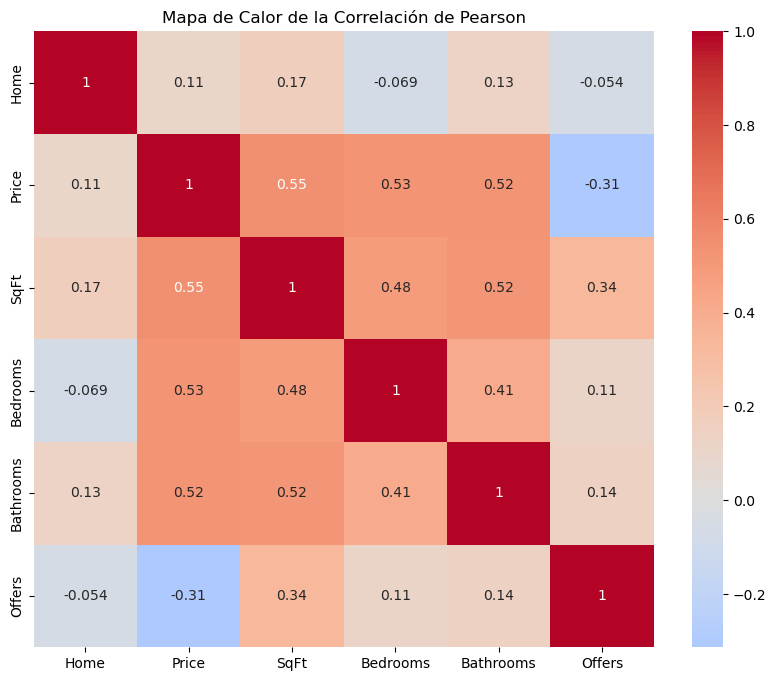

In [ ]:
df_numeric = df.select_dtypes(include = ['int64', 'float64'])
correlation_matrix = df_numeric.corr(method = 'pearson')
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', center = 0)
plt.title('Mapa de Calor de la Correlación de Pearson')
plt.show()

In [12]:
#Vamos a separar las variables predictoras y el objetivo
X = df[['SqFt', 'Bedrooms', 'Bathrooms']]
y = df['Price']

#Dividimos los datos en el conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:

#Creamos y entrenamos el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

#Realizamos las predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)


In [15]:
#Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'El error cuadrático medio (MSE) es: {mse}')
print(f'R-cuadrado: {r2}')

El error cuadrático medio (MSE) es: 320149938.23026824
R-cuadrado: 0.4568195777548876


In [18]:
#Ahora la predicción para la casa
caracteristica = ['SqFt', 'Bedrooms', 'Bathrooms']
new_house = [[2000, 3, 2]]
X_input = pd.DataFrame(new_house, columns=caracteristica)
prediction = modelo.predict(X_input)
print(f'La predicción del precio es: {prediction}')


La predicción del precio es: [123536.99693218]
